In [2]:
# for univariate linear regression with feature scaling
import pandas as pd
import numpy as np
import math
import copy
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [3]:

df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Daiyan\Coding\databases and other tools\Daegu_Real_Estate_data.csv")

df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Daiyan\Coding\databases and other tools\Daegu_Real_Estate_data.csv")

In [4]:
def z_score_normalization(x):
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x_norm = (x-mu)/sigma
    return x_norm

In [5]:
def compute_cost(x,w,b):
    m=len(x)
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i] + b
    return f_wb

In [6]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dJ_db=0
    dJ_dw=0
    for i in range(m):
        f_wb = w * x[i] + b
        dJ_dw_i = (f_wb - y[i]) * x[i]
        dJ_db_i = (f_wb - y[i])
        dJ_dw += dJ_dw_i
        dJ_db += dJ_db_i
    dJ_dw = dJ_dw / m
    dJ_db = dJ_db / m
    return dJ_dw, dJ_db

In [7]:
def gradient_descent(x, y, w_in, b_in, a, num_iters, compute_cost,compute_gradient):
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dJ_dw, dJ_db = compute_gradient(x,y,w,b)
        b = b - a * dJ_db
        w = w - a * dJ_dw
        if i<1000:
            J_history.append( compute_cost(x,w,b))
            p_history.append([w,b])
 
    return w, b, J_history, p_history

In [8]:
df2=df.rename(columns={'Size(sqf)': 'Size'})
x_train=np.array([],dtype=np.float64)
y_train=np.array([],dtype=np.float64)
n=800
for i in range(n):
    x_train=np.append(x_train,df2['Size'][i])
    y_train=np.append(y_train,df2['SalePrice'][i])
x_norm=x_train

In [9]:

w_init = 0
b_init = 0
iterations = 10000
a = 0.000000001
w_f, b_f, J_hist, p_hist = gradient_descent(x_norm ,y_train, w_init, b_init, a, 
                                                    iterations, compute_cost, compute_gradient)
np.set_printoptions(precision=3,suppress=True) 
print(f"(w,b) found by gradient descent: ({w_f:3f},{b_f:3f})")


(w,b) found by gradient descent: (188.085729,0.110514)


188.08572855394618 0.110514413554989


<function matplotlib.pyplot.show(close=None, block=None)>

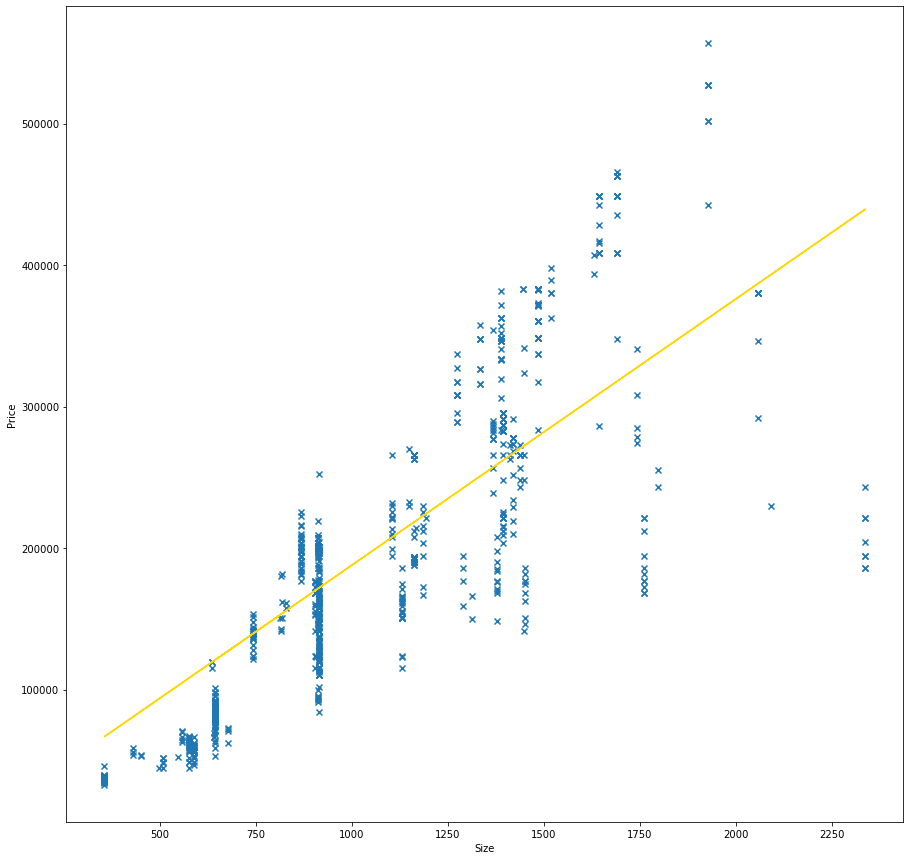

In [12]:
plt.figure(figsize=(15,15))

print(w_f,b_f)
plt.xlabel("Size")
plt.ylabel("Price")
fn=compute_cost(x_norm,w_f,b_f)
plt.scatter(x_norm,y_train, marker='x')
plt.plot(x_norm,fn, color='gold')
plt.show